# Chapter 6 - Other Popular Machine Learning Methods
## Segment 6 - Ensemble methods with random forest

This is a classification problem, where in we will be estimating the species label for iris flowers.

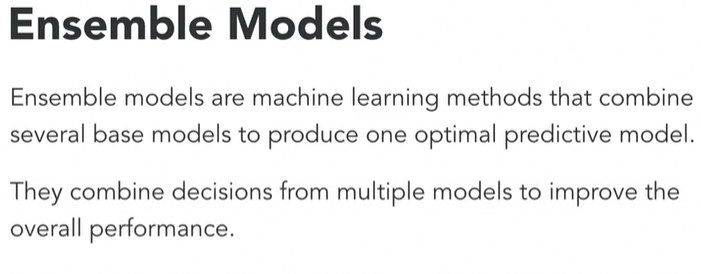

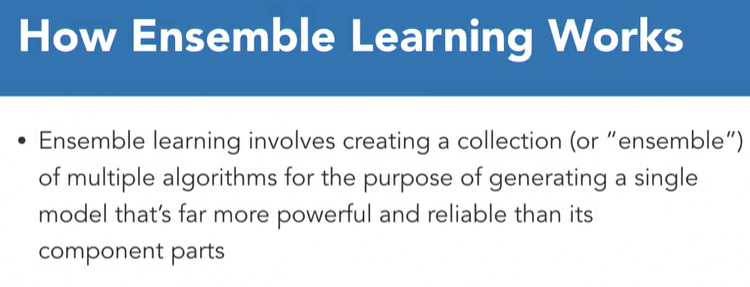

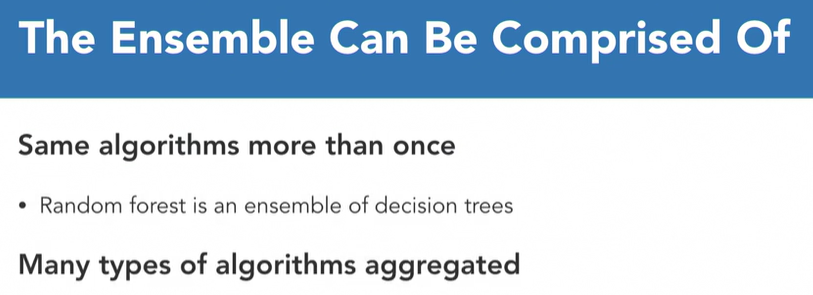

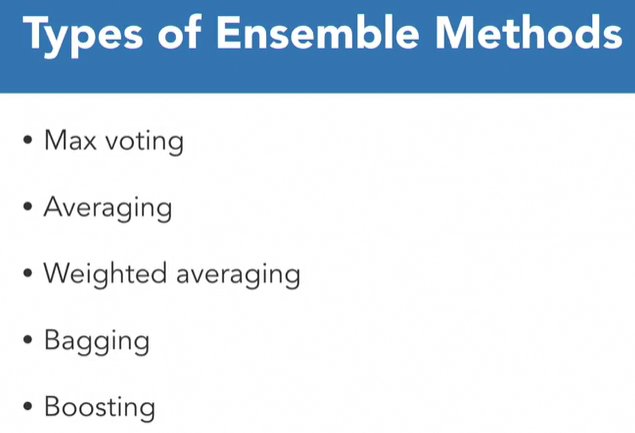

# Bagging in this demonstration

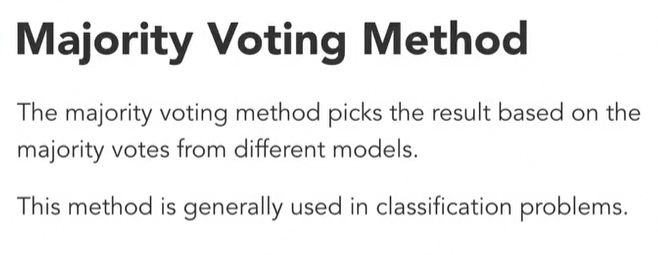

A good example of this method is, you ask a couple of people to rate a restaurant on a scale of one to 10. Suppose three people rated the restaurant a seven, and five people gave it an eight. The ensemble method would pick eight as the rating for the restaurant since most people voted an eight.

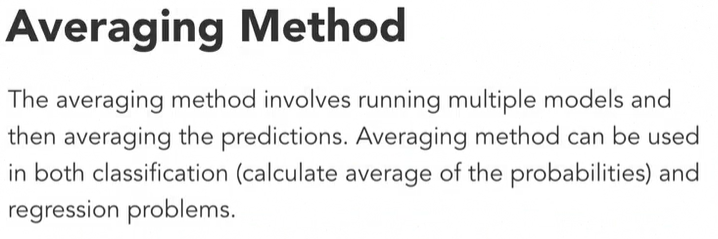

aking the example from majority voting, the averages of all ratings would be 7.625.

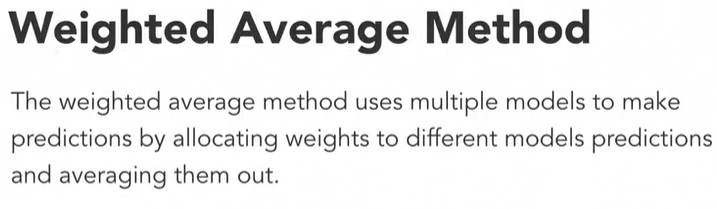

In the above example, we give more weightage to the last two persons, hence the final rating changes.

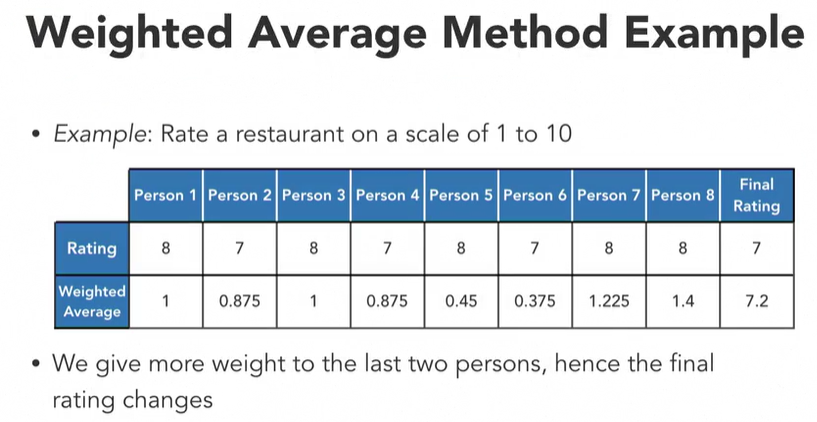

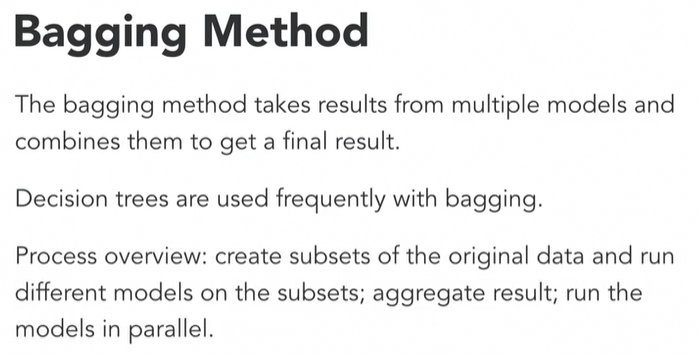

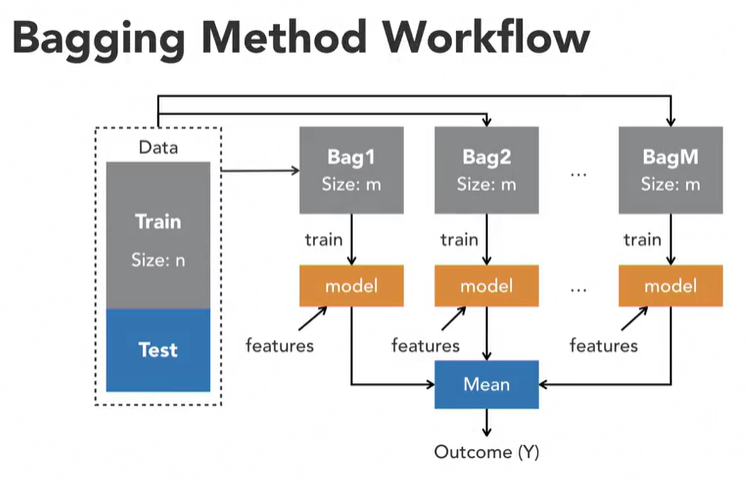

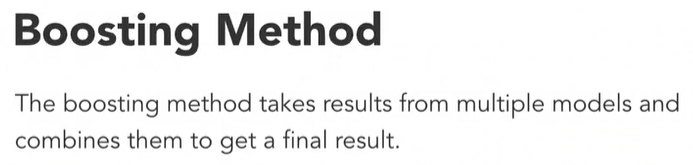

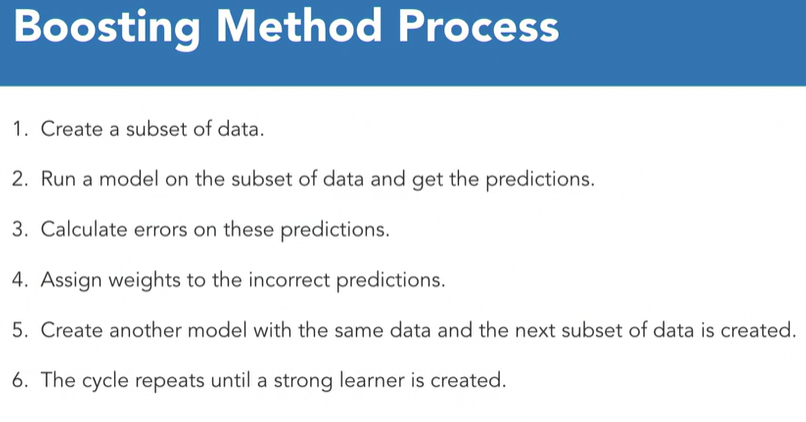

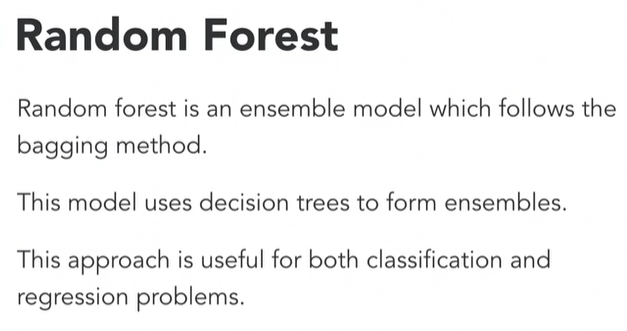

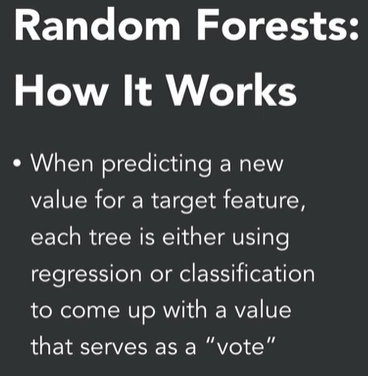

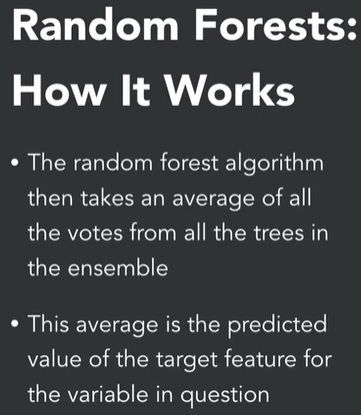

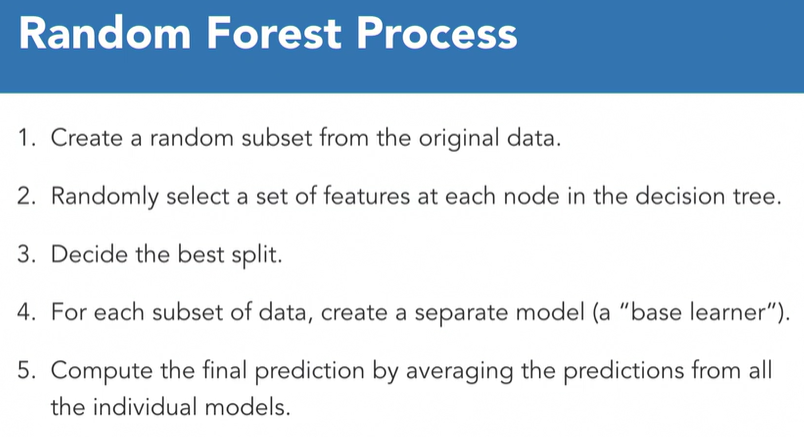

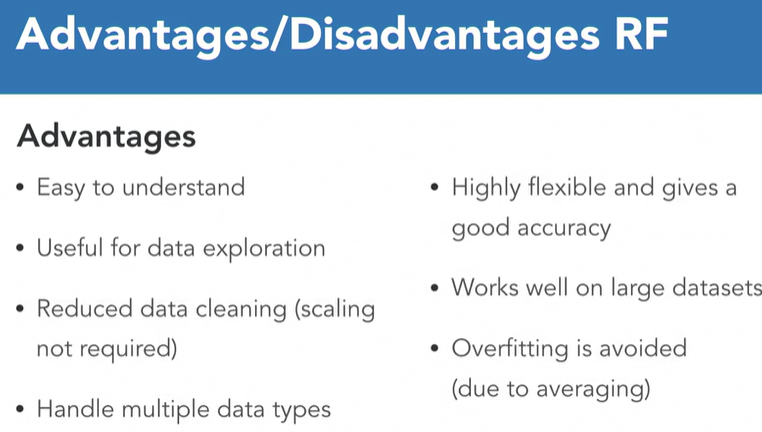

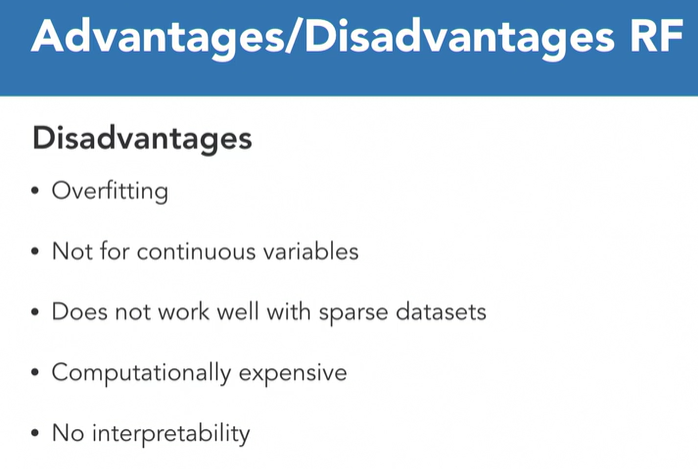

# Demonstration

In [1]:
import numpy as np
import pandas as pd

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target)

y.columns = ['labels']

print(df.head())
y[0:5]

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


,labels
0,0
1,0
2,0
3,0
4,0


The data set contains information on the:
- sepal length (cm)
- sepal width (cm)  
- petal length (cm)  
- petal width (cm)

are predictors of =

- species type

In [4]:
df.isnull().any()==True

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

In [5]:
print(y.labels.value_counts())

2    50
1    50
0    50
Name: labels, dtype: int64


### Theres 50 flowers on each class

# Preparing the data for training the model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2, random_state=17)

# Build a Random Forest model

In [11]:
classifier = RandomForestClassifier(n_estimators=200, random_state=0)
#### n estimators is the parameter of how many trees we want??


### we need to reformat our target data, so that it conforms to the requirement of the model. So, lets create a new variable called y_train_array, and set that equal to the output of our ravel function
y_train_array = np.ravel(y_train)

classifier.fit(X_train, y_train_array)

y_pred = classifier.predict(X_test)

# Evaluating the model on the test data

In [8]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [9]:
y_test_array = np.ravel(y_test)
print(y_test_array)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 2 0 2 1 1 1 1 1 0 1]


In [10]:
print(y_pred)

[0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 1 1 1 1 0 1]
